In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
from mylib.adaline import AdalineGD

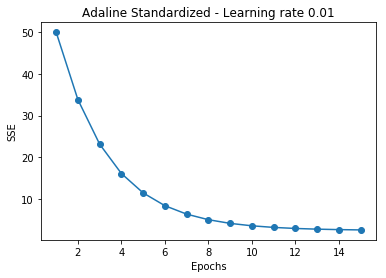

In [5]:
if __name__ == '__main__':
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa', -1, 1)
    X = df.iloc[0:100, [0, 2]].values
    
    # X를 X_std에 하나 복사
    # X_std = X 와 무엇이 다르지?
    X_std = np.copy(X)

    # 표준화(standardization)
    X_std[:,0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:,1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    
    # Learning rate 값을 0.01에 두어도 발산하지 않는 것을 볼 수 있다.
    # 모든 트레이닝 데이터를 한꺼번에 일괄 적용하여 학습에 수행하였음.
    # 이를 배치 경사하강법(Batch Gradient Descent)라고 부른다.
    # 다만 데이터의 개수가 매우 많아질 경우 머신러닝이 비효율적이게 된다.
    adal = AdalineGD(eta=0.01, n_iter=15).fit(X_std, y)
    plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('SSE')
    plt.title('Adaline Standardized - Learning rate 0.01')    
    plt.show()